# 0. Collecting Data

In [ ]:
import tweepy
import csv
from tweepy import OAuthHandler
 
consumer_key = 'XXXXX'
consumer_secret = 'XXXXX'
access_token = 'XXXXX'
access_secret = 'XXXXX'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth,wait_on_rate_limit = True)
csvFile = open('result.csv', 'a')
count=0

#Use csv writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,
                           q = "sridevi",
                           rpp=10,
                           tweet_mode='extended',
                           lang = "en").items(1000):

    # Write a row to the CSV file. I use encode UTF-8
    if 'retweeted_status' not in dir(tweet):
        csvWriter.writerow([tweet.created_at, tweet.full_text.encode('utf-8')])
        count=count+1;
        print(tweet.full_text)
    
    
csvFile.close()
print(count);

# 1. Loading Data

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
df=pd.read_csv('./data/result.csv',header=None)
mystery=pd.read_csv('./data/mystery.csv',header=None)
print(df.head())
print(mystery.head())

                     0  \
0  2018-02-26 19:05:19   
1  2018-02-26 19:05:13   
2  2018-02-26 19:05:10   
3  2018-02-26 19:05:09   
4  2018-02-26 19:05:09   

                                                                                                                                             1  
0  b'Sridevi died of accidental drowning, says\xc2\xa0report https://t.co/aeuVcywTQE https://t.co/wBmlcJmCLv'                                   
1  b"When stars weren't like you and me, there was Sridevi | Newslaundry https://t.co/3eSPGkfYmj via @newslaundry"                              
2  b'Bollywood star Sridevi dead at 54 https://t.co/SfJJZ2SSyM https://t.co/ZYWaxZ0S2Y'                                                         
3  b'This felt like a well thought out article... Hence, sharing.\nThis shocking news is sadder than what it seems... https://t.co/NVc3ZEzZ2q'  
4  b"Indian Media is seeing mystery in Sridevi's death.\n\nSame Media didn't find anything suspicious in Justice Loya'

In [3]:
print(df.shape)

(191, 2)


# 2. Cleansing Data

In [4]:
# #[^\s+]* -- hashtag 
# https:[^\s]* -- URL links
# @[^\s]* -- mentions
# \\x[^\s]* -- smiley
# [\\]n -- new line

import re 

init_string=re.compile(r'b[\'\"]')
newline=re.compile(r'[\\]n')
links=re.compile(r'https:[^\s]*')
hashtag=re.compile(r'#[^\s+]*')
mentions=re.compile(r'@[^\s]*')
smileys=re.compile(r'\\x[^\s]*')
symbols=re.compile(r'[\'\,\?\.\|\\\/\!\"\;\:\@\#\$\%\^\&\*\(\)\-\_\+\=\[\]\{\}\<\>]')

for index,row in df.iterrows():
    df[1][index]=re.sub(init_string,'',df[1][index])
    df[1][index]=re.sub(newline,'',df[1][index])
    df[1][index]=re.sub(links,'',df[1][index])
    df[1][index]=re.sub(hashtag,'',df[1][index])
    df[1][index]=re.sub(mentions,'',df[1][index])
    df[1][index]=re.sub(smileys,'',df[1][index])
    df[1][index]=re.sub(symbols,'',df[1][index])
    df[1][index]=df[1][index].lower()

for index,row in mystery.iterrows():
    mystery[1][index]=re.sub(init_string,'',mystery[1][index])
    mystery[1][index]=re.sub(newline,'',mystery[1][index])
    mystery[1][index]=re.sub(links,'',mystery[1][index])
    mystery[1][index]=re.sub(hashtag,'',mystery[1][index])
    mystery[1][index]=re.sub(mentions,'',mystery[1][index])
    mystery[1][index]=re.sub(smileys,'',mystery[1][index])
    mystery[1][index]=re.sub(symbols,'',mystery[1][index])
    mystery[1][index]=mystery[1][index].lower()
    
print(df.head())
print(mystery.head())


                     0  \
0  2018-02-26 19:05:19   
1  2018-02-26 19:05:13   
2  2018-02-26 19:05:10   
3  2018-02-26 19:05:09   
4  2018-02-26 19:05:09   

                                                                                                                             1  
0  sridevi died of accidental drowning says                                                                                     
1  when stars werent like you and me there was sridevi  newslaundry  via                                                        
2  bollywood star sridevi dead at 54                                                                                            
3  this felt like a well thought out article hence sharingthis shocking news is sadder than what it seems                       
4  indian media is seeing mystery in sridevis deathsame media didnt find anything suspicious in justice loyas deathinteresting  
                     0  \
0  2018-02-26 19:16:23   
1  2018-02-26 19:

# 3. Visualizing Data

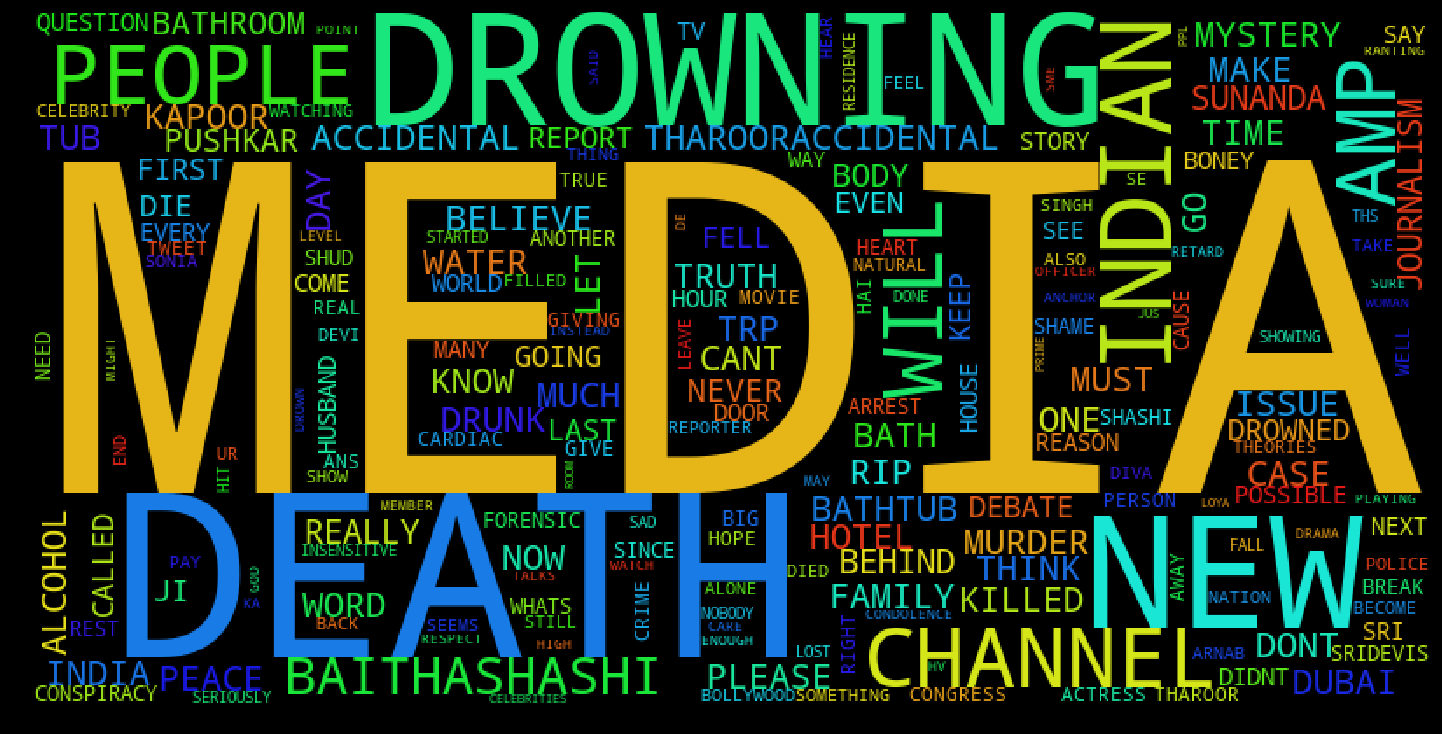

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
def wordcloud_generate(tweets,heading):
    stopwords = set(STOPWORDS)
    stopwords.add("sridevi")
    wordcloud = WordCloud(stopwords=stopwords,random_state = 2018,width=800, height=400).generate(" ".join([i for i in tweets[1].str.upper()]))
    plt.figure( figsize=(20,10),facecolor='k' )
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    #plt.title(heading)
wordcloud_generate(mystery,'Mystery')  

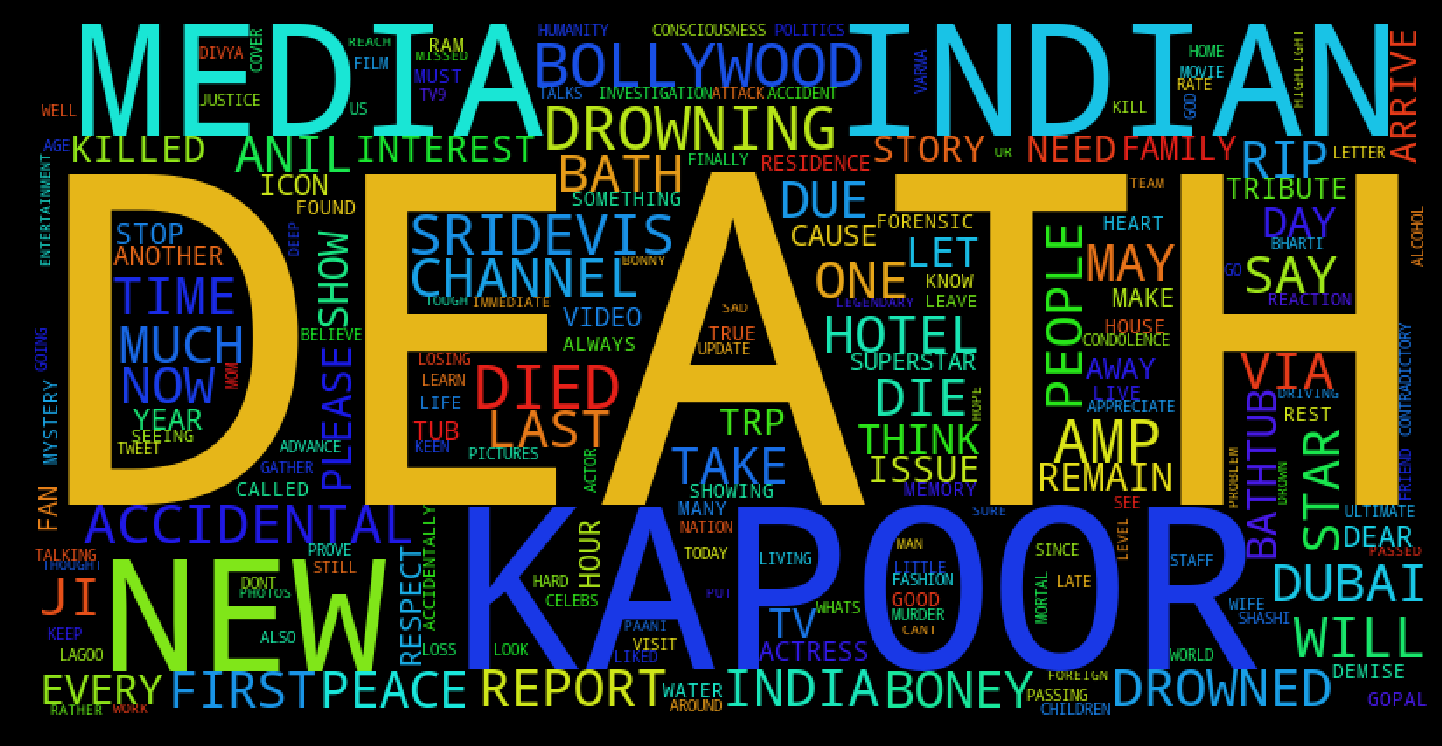

In [18]:
wordcloud_generate(df,'Death Analysis')  